# Term Project

### Import Statements
These imports statements are our reference to the implementations used in our pipeline tasks. Our data collection pipeline can be viewed in 'dataCollection.ipynb'.

In [29]:
import os
import time
import pandas as pd
import numpy as np
import pickle
import argparse
import datetime
import matplotlib.pyplot as plt

from netunicorn.client.remote import RemoteClient, RemoteClientException
from netunicorn.base import Experiment, ExperimentStatus, Pipeline
from netunicorn.library.tasks.basic import SleepTask

### Set Up netUnicorn
Choosing a device for our project. Using our group's netUnicorn API credentials.

In [25]:
NETUNICORN_ENDPOINT = os.environ.get('NETUNICORN_ENDPOINT', 'https://pinot.cs.ucsb.edu/netunicorn')
NETUNICORN_LOGIN = os.environ.get('NETUNICORN_LOGIN', 'cs190n8')       
NETUNICORN_PASSWORD = os.environ.get('NETUNICORN_PASSWORD', 'kfazTdrx')

In [26]:
client = RemoteClient(endpoint=NETUNICORN_ENDPOINT, login=NETUNICORN_LOGIN, password=NETUNICORN_PASSWORD)
print("Health Check: {}".format(client.healthcheck()))
nodes = client.get_nodes()
print(nodes)

Health Check: True
[[snl-server-5], <Uncountable node pool with next node template: [aws-fargate-A-cs190n8-, aws-fargate-B-cs190n8-, aws-fargate-ARM64-cs190n8-]>]


In [27]:
working_node = 'snl-server-5'

### Collecting Network Data for Video Streaming
In our collecting network data pipeline we will be collecting packet captures while streaming video for YouTube, Vimeo, and Twitch. Our data collection pipeline can be viewed in 'dataCollection.ipynb'.

### Convert Packet Trace to CSV
After running our pipeline to collect data (60 packet features), we converted them into CSVs using the DockerImage. 

In [2]:
df_youtube1 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture1.pcap_Flow.csv")
df_youtube2 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture2.pcap_Flow.csv")
df_youtube3 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture3.pcap_Flow.csv")
df_youtube4 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture4.pcap_Flow.csv")
df_youtube5 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture5.pcap_Flow.csv")
df_youtube6 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture6.pcap_Flow.csv")
df_youtube7 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture7.pcap_Flow.csv")
df_youtube8 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture8.pcap_Flow.csv")
df_youtube9 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture9.pcap_Flow.csv")
df_youtube10 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture10.pcap_Flow.csv")
df_youtube11 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture11.pcap_Flow.csv")
df_youtube12 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture12.pcap_Flow.csv")
df_youtube13 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture13.pcap_Flow.csv")
df_youtube14 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture14.pcap_Flow.csv")
df_youtube15 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture15.pcap_Flow.csv")
df_youtube16 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture16.pcap_Flow.csv")
df_youtube17 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture17.pcap_Flow.csv")
df_youtube18 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture18.pcap_Flow.csv")
df_youtube19 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture19.pcap_Flow.csv")
df_youtube20 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_youtube_capture/output/new_youtube_capture20.pcap_Flow.csv")

df_vimeo1 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture1.pcap_Flow.csv")
df_vimeo2 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture2.pcap_Flow.csv")
df_vimeo3 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture3.pcap_Flow.csv")
df_vimeo4 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture4.pcap_Flow.csv")
df_vimeo5 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture5.pcap_Flow.csv")
df_vimeo6 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture6.pcap_Flow.csv")
df_vimeo7 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture7.pcap_Flow.csv")
df_vimeo8 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture8.pcap_Flow.csv")
df_vimeo9 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture9.pcap_Flow.csv")
df_vimeo10 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture10.pcap_Flow.csv")
df_vimeo11 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture11.pcap_Flow.csv")
df_vimeo12 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture12.pcap_Flow.csv")
df_vimeo13 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture13.pcap_Flow.csv")
df_vimeo14 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture14.pcap_Flow.csv")
df_vimeo15 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture15.pcap_Flow.csv")
df_vimeo16 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture16.pcap_Flow.csv")
df_vimeo17 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture17.pcap_Flow.csv")
df_vimeo18 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture18.pcap_Flow.csv")
df_vimeo19 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture19.pcap_Flow.csv")
df_vimeo20 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_vimeo_capture/output/new_vimeo_capture20.pcap_Flow.csv")

df_twitch1 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture1.pcap_Flow.csv")
df_twitch2 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture2.pcap_Flow.csv")
df_twitch3 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture3.pcap_Flow.csv")
df_twitch4 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture4.pcap_Flow.csv")
df_twitch5 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture5.pcap_Flow.csv")
df_twitch6 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture6.pcap_Flow.csv")
df_twitch7 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture7.pcap_Flow.csv")
df_twitch8 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture8.pcap_Flow.csv")
df_twitch9 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture9.pcap_Flow.csv")
df_twitch10 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture10.pcap_Flow.csv")
df_twitch11 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture11.pcap_Flow.csv")
df_twitch12 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture12.pcap_Flow.csv")
df_twitch13 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture13.pcap_Flow.csv")
df_twitch14 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture14.pcap_Flow.csv")
df_twitch15 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture15.pcap_Flow.csv")
df_twitch16 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture16.pcap_Flow.csv")
df_twitch17 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture17.pcap_Flow.csv")
df_twitch18 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture18.pcap_Flow.csv")
df_twitch19 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture19.pcap_Flow.csv")
df_twitch20 = pd.read_csv("/mnt/md0/cs190n/cs190n8/new_twitch_capture/output/new_twitch_capture20.pcap_Flow.csv")


In [3]:
print(df_twitch1.columns) 

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [4]:
print(df_youtube1.columns)

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [5]:
print(df_vimeo1.columns)

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

### Separate CSVs to video_sent & video_acked
After reading in each CSV file, we called the function separate_video_packets() to extract the forward packets (*video_sent*) and backward packets (*video_acked*).

In [6]:
def separate_video_packets(df):
    # Add label to classify packets as 'sent' or 'acked'
    df['Label'] = 'other'
    
    # Define criteria for video sent and video acked
    df.loc[df['Src IP'] == '172.17.0.2', 'Label'] = 'sent'  # Outbound packets
    df.loc[df['Dst IP'] == '172.17.0.2', 'Label'] = 'acked'
    
    # Separate into sent and acked dataframes
    df_sent = df[df['Label'] == 'sent']
    df_acked = df[df['Label'] == 'acked']
    
    
    return df_sent, df_acked

df_youtube1_sent, df_youtube1_acked = separate_video_packets(df_youtube1)
df_youtube2_sent, df_youtube2_acked = separate_video_packets(df_youtube2)
df_youtube3_sent, df_youtube3_acked = separate_video_packets(df_youtube3)
df_youtube4_sent, df_youtube4_acked = separate_video_packets(df_youtube4)
df_youtube5_sent, df_youtube5_acked = separate_video_packets(df_youtube5)
df_youtube6_sent, df_youtube6_acked = separate_video_packets(df_youtube6)
df_youtube7_sent, df_youtube7_acked = separate_video_packets(df_youtube7)
df_youtube8_sent, df_youtube8_acked = separate_video_packets(df_youtube8)
df_youtube9_sent, df_youtube9_acked = separate_video_packets(df_youtube9)
df_youtube10_sent, df_youtube10_acked = separate_video_packets(df_youtube10)
df_youtube11_sent, df_youtube11_acked = separate_video_packets(df_youtube11)
df_youtube12_sent, df_youtube12_acked = separate_video_packets(df_youtube12)
df_youtube13_sent, df_youtube13_acked = separate_video_packets(df_youtube13)
df_youtube14_sent, df_youtube14_acked = separate_video_packets(df_youtube14)
df_youtube15_sent, df_youtube15_acked = separate_video_packets(df_youtube15)
df_youtube16_sent, df_youtube16_acked = separate_video_packets(df_youtube16)
df_youtube17_sent, df_youtube17_acked = separate_video_packets(df_youtube17)
df_youtube18_sent, df_youtube18_acked = separate_video_packets(df_youtube18)
df_youtube19_sent, df_youtube19_acked = separate_video_packets(df_youtube19)
df_youtube20_sent, df_youtube20_acked = separate_video_packets(df_youtube20)

df_vimeo1_sent, df_vimeo1_acked = separate_video_packets(df_vimeo1)
df_vimeo2_sent, df_vimeo2_acked = separate_video_packets(df_vimeo2)
df_vimeo3_sent, df_vimeo3_acked = separate_video_packets(df_vimeo3)
df_vimeo4_sent, df_vimeo4_acked = separate_video_packets(df_vimeo4)
df_vimeo5_sent, df_vimeo5_acked = separate_video_packets(df_vimeo5)
df_vimeo6_sent, df_vimeo6_acked = separate_video_packets(df_vimeo6)
df_vimeo7_sent, df_vimeo7_acked = separate_video_packets(df_vimeo7)
df_vimeo8_sent, df_vimeo8_acked = separate_video_packets(df_vimeo8)
df_vimeo9_sent, df_vimeo9_acked = separate_video_packets(df_vimeo9)
df_vimeo10_sent, df_vimeo10_acked = separate_video_packets(df_vimeo10)
df_vimeo11_sent, df_vimeo11_acked = separate_video_packets(df_vimeo11)
df_vimeo12_sent, df_vimeo12_acked = separate_video_packets(df_vimeo12)
df_vimeo13_sent, df_vimeo13_acked = separate_video_packets(df_vimeo13)
df_vimeo14_sent, df_vimeo14_acked = separate_video_packets(df_vimeo14)
df_vimeo15_sent, df_vimeo15_acked = separate_video_packets(df_vimeo15)
df_vimeo16_sent, df_vimeo16_acked = separate_video_packets(df_vimeo16)
df_vimeo17_sent, df_vimeo17_acked = separate_video_packets(df_vimeo17)
df_vimeo18_sent, df_vimeo18_acked = separate_video_packets(df_vimeo18)
df_vimeo19_sent, df_vimeo19_acked = separate_video_packets(df_vimeo19)
df_vimeo20_sent, df_vimeo20_acked = separate_video_packets(df_vimeo20)

df_twitch1_sent, df_twitch1_acked = separate_video_packets(df_twitch1)
df_twitch2_sent, df_twitch2_acked = separate_video_packets(df_twitch2)
df_twitch3_sent, df_twitch3_acked = separate_video_packets(df_twitch3)
df_twitch4_sent, df_twitch4_acked = separate_video_packets(df_twitch4)
df_twitch5_sent, df_twitch5_acked = separate_video_packets(df_twitch5)
df_twitch6_sent, df_twitch6_acked = separate_video_packets(df_twitch6)
df_twitch7_sent, df_twitch7_acked = separate_video_packets(df_twitch7)
df_twitch8_sent, df_twitch8_acked = separate_video_packets(df_twitch8)
df_twitch9_sent, df_twitch9_acked = separate_video_packets(df_twitch9)
df_twitch10_sent, df_twitch10_acked = separate_video_packets(df_twitch10)
df_twitch11_sent, df_twitch11_acked = separate_video_packets(df_twitch11)
df_twitch12_sent, df_twitch12_acked = separate_video_packets(df_twitch12)
df_twitch13_sent, df_twitch13_acked = separate_video_packets(df_twitch13)
df_twitch14_sent, df_twitch14_acked = separate_video_packets(df_twitch14)
df_twitch15_sent, df_twitch15_acked = separate_video_packets(df_twitch15)
df_twitch16_sent, df_twitch16_acked = separate_video_packets(df_twitch16)
df_twitch17_sent, df_twitch17_acked = separate_video_packets(df_twitch17)
df_twitch18_sent, df_twitch18_acked = separate_video_packets(df_twitch18)
df_twitch19_sent, df_twitch19_acked = separate_video_packets(df_twitch19)
df_twitch20_sent, df_twitch20_acked = separate_video_packets(df_twitch20)


### Prepare CSV Data

In [7]:
VIDEO_DURATION = 180180
PKT_BYTES = 1500
MILLION = 1000000
PAST_CHUNKS = 8
FUTURE_CHUNKS = 5

In [8]:
df_youtube1_sent.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.17.0.2-185.199.109.153-52344-443-6,172.17.0.2,52344,185.199.109.153,443,6,06/12/2024 08:36:55 PM,44287,204,230,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sent
2,172.17.0.2-143.244.49.180-60380-443-6,172.17.0.2,60380,143.244.49.180,443,6,06/12/2024 08:36:55 PM,98837,10,9,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sent
3,172.17.0.2-142.250.189.14-54754-443-6,172.17.0.2,54754,142.250.189.14,443,6,06/12/2024 08:36:57 PM,35264,9,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sent
5,172.17.0.2-142.250.72.150-53656-443-6,172.17.0.2,53656,142.250.72.150,443,6,06/12/2024 08:36:57 PM,75633,5,5,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sent
8,172.17.0.2-142.250.68.46-40058-443-6,172.17.0.2,40058,142.250.68.46,443,6,06/12/2024 08:36:59 PM,20225,9,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sent


In [9]:
df_youtube1_acked.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1,185.199.109.153-172.17.0.2-443-52344-6,185.199.109.153,443,172.17.0.2,52344,6,06/12/2024 08:36:55 PM,10,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,acked
4,142.250.189.14-172.17.0.2-443-54754-6,142.250.189.14,443,172.17.0.2,54754,6,06/12/2024 08:36:57 PM,24,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,acked
6,142.250.72.150-172.17.0.2-443-53656-6,142.250.72.150,443,172.17.0.2,53656,6,06/12/2024 08:36:57 PM,9,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,acked
7,142.250.72.150-172.17.0.2-443-53656-6,142.250.72.150,443,172.17.0.2,53656,6,06/12/2024 08:36:57 PM,11,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,acked
10,142.250.68.46-172.17.0.2-443-40058-6,142.250.68.46,443,172.17.0.2,40058,6,06/12/2024 08:36:59 PM,15,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,acked


In [10]:
print(df_youtube1_sent['Flow Duration'].head())
print(df_youtube1_acked['Flow Duration'].head())

0    44287
2    98837
3    35264
5    75633
8    20225
Name: Flow Duration, dtype: int64
1     10
4     24
6      9
7     11
10    15
Name: Flow Duration, dtype: int64


In [11]:
def prepare_raw_data(video_sent_df, video_acked_df, time_start=None, time_end=None):
    """
    Prepare raw data by converting timestamps to nanoseconds, filtering by time range,
    and calculating transmission times.
    """

    # Ensure the 'Timestamp' column is in datetime format
    if video_sent_df['Timestamp'].dtype != 'datetime64[ns]':
        video_sent_df['Timestamp'] = pd.to_datetime(video_sent_df['Timestamp'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

    if video_acked_df['Timestamp'].dtype != 'datetime64[ns]':
        video_acked_df['Timestamp'] = pd.to_datetime(video_acked_df['Timestamp'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

    # Drop rows with invalid timestamps
    video_sent_df = video_sent_df.dropna(subset=['Timestamp'])
    video_acked_df = video_acked_df.dropna(subset=['Timestamp'])

    # Convert timestamps to nanoseconds
    video_sent_df['time'] = (video_sent_df['Timestamp'].astype('int64'))  # Convert datetime to int64 (nanoseconds)
    video_acked_df['time'] = (video_acked_df['Timestamp'].astype('int64'))

    # Filter by time range (use datetime comparison)
    if time_start:
        time_start = pd.to_datetime(time_start)
        video_sent_df = video_sent_df[video_sent_df['time'] >= time_start]
        video_acked_df = video_acked_df[video_acked_df['time'] >= time_start]

    if time_end:
        time_end = pd.to_datetime(time_end)
        video_sent_df = video_sent_df[video_sent_df['time'] <= time_end]
        video_acked_df = video_acked_df[video_acked_df['time'] <= time_end]

    # Process the data
    return calculate_trans_times(video_sent_df, video_acked_df)



### Calculate Transmission Times & Divide into Chunks

In [12]:
def calculate_trans_times(video_sent_df, video_acked_df):
    """
    Calculate transmission times from video_sent and video_acked datasets using Flow ID,
    falling back to Flow Duration if timestamps are too similar.
    """
    d = {}
    last_video_ts = {}

    # Process video_sent_df
    for _, row in video_sent_df.iterrows():
        flow_id = (row['Src IP'], row['Dst IP'], row['Src Port'], row['Dst Port'], row['Protocol'])
        if flow_id not in d:
            d[flow_id] = {}
            last_video_ts[flow_id] = None

        video_ts = row['Timestamp']
        if last_video_ts[flow_id] is not None:
            expected_video_ts = last_video_ts[flow_id] + pd.Timedelta(seconds=VIDEO_DURATION)
            if video_ts != expected_video_ts:
                continue

        last_video_ts[flow_id] = video_ts
        d[flow_id][video_ts] = {
            'sent_ts': video_ts,
            'size': float(row['Total Fwd Packet']) / PKT_BYTES,
            'delivery_rate': float(row['Fwd Seg Size Min']) / PKT_BYTES,
            'cwnd': float(row['FWD Init Win Bytes']) / PKT_BYTES,
            'in_flight': float(row['Total Fwd Packet']) / PKT_BYTES,
            'min_rtt': float(row['Flow IAT Min']) / MILLION,
            'rtt': float(row['Flow Duration']) / MILLION,
            'flow_duration_sent': float(row['Flow Duration']) / MILLION,  # Convert to seconds
        }

    # Process video_acked_df
    for _, row in video_acked_df.iterrows():
        flow_id = (row['Dst IP'], row['Src IP'], row['Dst Port'], row['Src Port'], row['Protocol'])
        if flow_id not in d:
            continue

        video_ts = row['Timestamp']

        # Find the closest matching video_ts
        closest_video_ts = min(
            d[flow_id].keys(),
            key=lambda ts: abs(ts - video_ts),
            default=None
        )

        if closest_video_ts is None:
            continue

        # Update the acked data
        dsv = d[flow_id][closest_video_ts]
        sent_ts = dsv['sent_ts']
        acked_ts = video_ts

        # Add a minimum time difference if sent_ts == acked_ts
        if sent_ts == acked_ts:
            trans_time = float(row['Flow Duration']) / MILLION  # Use Flow Duration as fallback
        else:
            trans_time = (acked_ts - sent_ts).total_seconds()

        dsv['acked_ts'] = acked_ts
        dsv['trans_time'] = trans_time

    # Clean up negative transmission times
    for flow_id in list(d.keys()):
        d[flow_id] = {
            video_ts: data
            for video_ts, data in d[flow_id].items()
            if data.get('trans_time', 0) >= 0
        }

    return d


### Prepare the Raw Data
Using the functions defined above, we prepared the raw data of the forward and backward packets of each file.

In [13]:
print(df_youtube1_sent)

                                   Flow ID      Src IP  Src Port  \
0   172.17.0.2-185.199.109.153-52344-443-6  172.17.0.2     52344   
2    172.17.0.2-143.244.49.180-60380-443-6  172.17.0.2     60380   
3    172.17.0.2-142.250.189.14-54754-443-6  172.17.0.2     54754   
5    172.17.0.2-142.250.72.150-53656-443-6  172.17.0.2     53656   
8     172.17.0.2-142.250.68.46-40058-443-6  172.17.0.2     40058   
..                                     ...         ...       ...   
88          172.17.0.2-8.8.8.8-53-37729-17  172.17.0.2        53   
89       172.17.0.2-128.111.1.1-8280-53-17  172.17.0.2      8280   
90      172.17.0.2-128.111.1.1-23254-53-17  172.17.0.2     23254   
91   172.17.0.2-198.189.66.13-60445-443-17  172.17.0.2     60445   
92      172.17.0.2-128.111.1.1-46625-53-17  172.17.0.2     46625   

             Dst IP  Dst Port  Protocol               Timestamp  \
0   185.199.109.153       443         6  06/12/2024 08:36:55 PM   
2    143.244.49.180       443         6  06/12/20

In [14]:
print(df_youtube1_acked)

                                   Flow ID           Src IP  Src Port  \
1   185.199.109.153-172.17.0.2-443-52344-6  185.199.109.153       443   
4    142.250.189.14-172.17.0.2-443-54754-6   142.250.189.14       443   
6    142.250.72.150-172.17.0.2-443-53656-6   142.250.72.150       443   
7    142.250.72.150-172.17.0.2-443-53656-6   142.250.72.150       443   
10    142.250.68.46-172.17.0.2-443-40058-6    142.250.68.46       443   

        Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
1   172.17.0.2     52344         6  06/12/2024 08:36:55 PM             10   
4   172.17.0.2     54754         6  06/12/2024 08:36:57 PM             24   
6   172.17.0.2     53656         6  06/12/2024 08:36:57 PM              9   
7   172.17.0.2     53656         6  06/12/2024 08:36:57 PM             11   
10  172.17.0.2     40058         6  06/12/2024 08:36:59 PM             15   

    Total Fwd Packet  Total Bwd packets  ...  Fwd Seg Size Min  Active Mean  \
1                  

In [15]:
yt_d_1 = prepare_raw_data(df_youtube1_sent, df_youtube1_acked)
yt_d_2 = prepare_raw_data(df_youtube2_sent, df_youtube2_acked)
yt_d_3 = prepare_raw_data(df_youtube3_sent, df_youtube3_acked)
yt_d_4 = prepare_raw_data(df_youtube4_sent, df_youtube4_acked)
yt_d_5 = prepare_raw_data(df_youtube5_sent, df_youtube5_acked)
yt_d_6 = prepare_raw_data(df_youtube6_sent, df_youtube6_acked)
yt_d_7 = prepare_raw_data(df_youtube7_sent, df_youtube7_acked)
yt_d_8 = prepare_raw_data(df_youtube8_sent, df_youtube8_acked)
yt_d_9 = prepare_raw_data(df_youtube9_sent, df_youtube9_acked)
yt_d_10 = prepare_raw_data(df_youtube10_sent, df_youtube10_acked)
yt_d_11 = prepare_raw_data(df_youtube11_sent, df_youtube11_acked)
yt_d_12 = prepare_raw_data(df_youtube12_sent, df_youtube12_acked)
yt_d_13 = prepare_raw_data(df_youtube13_sent, df_youtube13_acked)
yt_d_14 = prepare_raw_data(df_youtube14_sent, df_youtube14_acked)
yt_d_15 = prepare_raw_data(df_youtube15_sent, df_youtube15_acked)
yt_d_16 = prepare_raw_data(df_youtube16_sent, df_youtube16_acked)
yt_d_17 = prepare_raw_data(df_youtube17_sent, df_youtube17_acked)
yt_d_18 = prepare_raw_data(df_youtube18_sent, df_youtube18_acked)
yt_d_19 = prepare_raw_data(df_youtube19_sent, df_youtube19_acked)
yt_d_20 = prepare_raw_data(df_youtube20_sent, df_youtube20_acked)

vm_d_1 = prepare_raw_data(df_vimeo1_sent, df_vimeo1_acked)
vm_d_2 = prepare_raw_data(df_vimeo2_sent, df_vimeo2_acked)
vm_d_3 = prepare_raw_data(df_vimeo3_sent, df_vimeo3_acked)
vm_d_4 = prepare_raw_data(df_vimeo4_sent, df_vimeo4_acked)
vm_d_5 = prepare_raw_data(df_vimeo5_sent, df_vimeo5_acked)
vm_d_6 = prepare_raw_data(df_vimeo6_sent, df_vimeo6_acked)
vm_d_7 = prepare_raw_data(df_vimeo7_sent, df_vimeo7_acked)
vm_d_8 = prepare_raw_data(df_vimeo8_sent, df_vimeo8_acked)
vm_d_9 = prepare_raw_data(df_vimeo9_sent, df_vimeo9_acked)
vm_d_10 = prepare_raw_data(df_vimeo10_sent, df_vimeo10_acked)
vm_d_11 = prepare_raw_data(df_vimeo11_sent, df_vimeo11_acked)
vm_d_12 = prepare_raw_data(df_vimeo12_sent, df_vimeo12_acked)
vm_d_13 = prepare_raw_data(df_vimeo13_sent, df_vimeo13_acked)
vm_d_14 = prepare_raw_data(df_vimeo14_sent, df_vimeo14_acked)
vm_d_15 = prepare_raw_data(df_vimeo15_sent, df_vimeo15_acked)
vm_d_16 = prepare_raw_data(df_vimeo16_sent, df_vimeo16_acked)
vm_d_17 = prepare_raw_data(df_vimeo17_sent, df_vimeo17_acked)
vm_d_18 = prepare_raw_data(df_vimeo18_sent, df_vimeo18_acked)
vm_d_19 = prepare_raw_data(df_vimeo19_sent, df_vimeo19_acked)
vm_d_20 = prepare_raw_data(df_vimeo20_sent, df_vimeo20_acked)

tw_d_1 = prepare_raw_data(df_twitch1_sent, df_twitch1_acked)
tw_d_2 = prepare_raw_data(df_twitch2_sent, df_twitch2_acked)
tw_d_3 = prepare_raw_data(df_twitch3_sent, df_twitch3_acked)
tw_d_4 = prepare_raw_data(df_twitch4_sent, df_twitch4_acked)
tw_d_5 = prepare_raw_data(df_twitch5_sent, df_twitch5_acked)
tw_d_6 = prepare_raw_data(df_twitch6_sent, df_twitch6_acked)
tw_d_7 = prepare_raw_data(df_twitch7_sent, df_twitch7_acked)
tw_d_8 = prepare_raw_data(df_twitch8_sent, df_twitch8_acked)
tw_d_9 = prepare_raw_data(df_twitch9_sent, df_twitch9_acked)
tw_d_10 = prepare_raw_data(df_twitch10_sent, df_twitch10_acked)
tw_d_11 = prepare_raw_data(df_twitch11_sent, df_twitch11_acked)
tw_d_12 = prepare_raw_data(df_twitch12_sent, df_twitch12_acked)
tw_d_13 = prepare_raw_data(df_twitch13_sent, df_twitch13_acked)
tw_d_14 = prepare_raw_data(df_twitch14_sent, df_twitch14_acked)
tw_d_15 = prepare_raw_data(df_twitch15_sent, df_twitch15_acked)
tw_d_16 = prepare_raw_data(df_twitch16_sent, df_twitch16_acked)
tw_d_17 = prepare_raw_data(df_twitch17_sent, df_twitch17_acked)
tw_d_18 = prepare_raw_data(df_twitch18_sent, df_twitch18_acked)
tw_d_19 = prepare_raw_data(df_twitch19_sent, df_twitch19_acked)
tw_d_20 = prepare_raw_data(df_twitch20_sent, df_twitch20_acked)


/tmp/ipykernel_3956739/2900322019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_sent_df['Timestamp'] = pd.to_datetime(video_sent_df['Timestamp'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
/tmp/ipykernel_3956739/2900322019.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_acked_df['Timestamp'] = pd.to_datetime(video_acked_df['Timestamp'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
/tmp/ipykernel_3956739/2900322019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

In [16]:
print(yt_d_1)

{('172.17.0.2', '185.199.109.153', 52344, 443, 6): {Timestamp('2024-06-12 20:36:55'): {'sent_ts': Timestamp('2024-06-12 20:36:55'), 'size': 0.136, 'delivery_rate': 0.013333333333333334, 'cwnd': 42.82666666666667, 'in_flight': 0.136, 'min_rtt': -2.4e-05, 'rtt': 0.044287, 'flow_duration_sent': 0.044287, 'acked_ts': Timestamp('2024-06-12 20:36:55'), 'trans_time': 1e-05}}, ('172.17.0.2', '143.244.49.180', 60380, 443, 6): {Timestamp('2024-06-12 20:36:55'): {'sent_ts': Timestamp('2024-06-12 20:36:55'), 'size': 0.006666666666666667, 'delivery_rate': 0.021333333333333333, 'cwnd': 42.82666666666667, 'in_flight': 0.006666666666666667, 'min_rtt': 1.9e-05, 'rtt': 0.098837, 'flow_duration_sent': 0.098837}}, ('172.17.0.2', '142.250.189.14', 54754, 443, 6): {Timestamp('2024-06-12 20:36:57'): {'sent_ts': Timestamp('2024-06-12 20:36:57'), 'size': 0.006, 'delivery_rate': 0.013333333333333334, 'cwnd': 42.82666666666667, 'in_flight': 0.006, 'min_rtt': 1e-05, 'rtt': 0.035264, 'flow_duration_sent': 0.035264

In [17]:
print(vm_d_1)

{('172.17.0.2', '185.199.109.153', 35540, 443, 6): {Timestamp('2024-07-12 22:02:51'): {'sent_ts': Timestamp('2024-07-12 22:02:51'), 'size': 0.15466666666666667, 'delivery_rate': 0.013333333333333334, 'cwnd': 42.82666666666667, 'in_flight': 0.15466666666666667, 'min_rtt': -1.1e-05, 'rtt': 0.048382, 'flow_duration_sent': 0.048382, 'acked_ts': Timestamp('2024-07-12 22:02:51'), 'trans_time': 3e-06}}, ('172.17.0.2', '143.244.49.177', 60700, 443, 6): {Timestamp('2024-07-12 22:02:51'): {'sent_ts': Timestamp('2024-07-12 22:02:51'), 'size': 0.007333333333333333, 'delivery_rate': 0.021333333333333333, 'cwnd': 42.82666666666667, 'in_flight': 0.007333333333333333, 'min_rtt': 4e-06, 'rtt': 0.110413, 'flow_duration_sent': 0.110413}}, ('172.17.0.2', '146.75.94.109', 48602, 443, 6): {Timestamp('2024-07-12 22:02:53'): {'sent_ts': Timestamp('2024-07-12 22:02:53'), 'size': 0.005333333333333333, 'delivery_rate': 0.013333333333333334, 'cwnd': 42.82666666666667, 'in_flight': 0.005333333333333333, 'min_rtt':

In [18]:
print(tw_d_1)

{('172.17.0.2', '185.199.110.153', 41604, 443, 6): {Timestamp('2024-06-12 22:27:43'): {'sent_ts': Timestamp('2024-06-12 22:27:43'), 'size': 0.14933333333333335, 'delivery_rate': 0.013333333333333334, 'cwnd': 42.82666666666667, 'in_flight': 0.14933333333333335, 'min_rtt': -1.9e-05, 'rtt': 0.043352, 'flow_duration_sent': 0.043352, 'acked_ts': Timestamp('2024-06-12 22:27:43'), 'trans_time': 9e-06}}, ('172.17.0.2', '143.244.49.179', 60240, 443, 6): {Timestamp('2024-06-12 22:27:43'): {'sent_ts': Timestamp('2024-06-12 22:27:43'), 'size': 0.006666666666666667, 'delivery_rate': 0.021333333333333333, 'cwnd': 42.82666666666667, 'in_flight': 0.006666666666666667, 'min_rtt': 2e-05, 'rtt': 0.106698, 'flow_duration_sent': 0.106698}}, ('172.17.0.2', '146.75.94.214', 46706, 443, 6): {Timestamp('2024-06-12 22:27:45'): {'sent_ts': Timestamp('2024-06-12 22:27:45'), 'size': 0.005333333333333333, 'delivery_rate': 0.013333333333333334, 'cwnd': 42.82666666666667, 'in_flight': 0.005333333333333333, 'min_rtt':

In [19]:
def append_past_chunks(ds, next_ts, row):
    """
    Append past chunks' delivery_rate, cwnd, in_flight, min_rtt, rtt, size, and trans_time
    to the row with padding for missing data.
    """
    i = 1
    past_chunks = []

    while i <= PAST_CHUNKS:
        ts = next_ts - pd.Timedelta(seconds=i * VIDEO_DURATION)  # Use Timedelta for consistent subtraction
        if ts in ds and 'trans_time' in ds[ts]:
            # Add the past chunk data
            past_chunks = [
                ds[ts]['delivery_rate'],
                ds[ts]['cwnd'],
                ds[ts]['in_flight'],
                ds[ts]['min_rtt'],
                ds[ts]['rtt'],
                ds[ts]['size'],
                ds[ts]['trans_time']
            ] + past_chunks
        else:
            # Pad with the nearest valid timestamp's data
            nts = ts + pd.Timedelta(seconds=VIDEO_DURATION)  # Nearest valid timestamp
            if nts in ds:
                padding = [
                    ds[nts]['delivery_rate'],
                    ds[nts]['cwnd'],
                    ds[nts]['in_flight'],
                    ds[nts]['min_rtt'],
                    ds[nts]['rtt']
                ]
                if nts == next_ts:
                    padding += [0, 0]  # If this is the first chunk, set size and trans_time to 0
                else:
                    padding += [ds[nts]['size'], ds[nts]['trans_time']]
                break
            else:
                # If no nearest timestamp exists, pad with zeros
                padding = [0, 0, 0, 0, 0, 0, 0]
                break
        i += 1

    # If padding was needed, extend with it for remaining past chunks
    if i != PAST_CHUNKS + 1:  # Check if we broke out of the loop
        while i <= PAST_CHUNKS:
            past_chunks = padding + past_chunks
            i += 1

    # Add the past chunk data to the row
    row += past_chunks


In [20]:
def prepare_input_output(d):
    """
    Prepare input and output data for future chunk predictions.
    Uses Flow ID as the session identifier.
    Returns a list of dictionaries containing 'in' and 'out' for each future chunk.
    """
    ret = [{'in': [], 'out': []} for _ in range(FUTURE_CHUNKS)]  # Predict FUTURE_CHUNKS

    for flow_id, flow_data in d.items():  # Flow ID as the session identifier
        for next_ts, info in flow_data.items():
            if 'trans_time' not in info:
                continue

            row = []

            # Append past chunks
            append_past_chunks(flow_data, next_ts, row)

            # Append the TCP info of the current chunk
            row += [
                info['delivery_rate'],
                info['cwnd'],
                info['in_flight'],
                info['min_rtt'],
                info['rtt']
            ]

            # Generate rows for FUTURE_CHUNKS
            for i in range(FUTURE_CHUNKS):
                row_i = row.copy()

                # Adjust ts with future chunks using Timedelta
                ts = next_ts + pd.Timedelta(seconds=i * VIDEO_DURATION)
                if ts in flow_data and 'trans_time' in flow_data[ts]:
                    row_i += [flow_data[ts]['size']]  # Future chunk size

                    # Append to 'in' and 'out' for the current future chunk
                    ret[i]['in'].append(row_i)
                    ret[i]['out'].append(flow_data[ts]['trans_time'])

    return ret



In [21]:
def save_processed_data(output_file, processed_data):
    """
    Append processed data to an existing .pkl file or create a new file if it doesn't exist.
    """
    try:
        # Try to load existing data
        with open(output_file, 'rb') as f:
            existing_data = pickle.load(f)
    except FileNotFoundError:
        # If the file does not exist, start with an empty list
        existing_data = []

    # Append new data
    existing_data.append(processed_data)

    # Save the updated data back to the file
    with open(output_file, 'wb') as f:
        pickle.dump(existing_data, f)

    print(f"Processed data appended to {output_file}")

In [22]:
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_1))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_2))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_3))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_4))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_5))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_6))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_7))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_8))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_9))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_10))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_11))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_12))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_13))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_14))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_15))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_16))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_17))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_18))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_19))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(yt_d_20))

save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_1))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_2))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_3))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_4))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_5))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_6))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_7))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_8))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_9))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_10))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_11))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_12))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_13))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_14))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_15))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_16))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_17))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_18))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_19))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(tw_d_20))

save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_1))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_2))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_3))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_4))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_5))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_6))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_7))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_8))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_9))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_10))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_11))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_12))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_13))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_14))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_15))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_16))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_17))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_18))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_19))
save_processed_data('/mnt/md0/cs190n/psabherwal/output_file4.pkl', prepare_input_output(vm_d_20))

Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Processed data appended to /mnt/md0/cs190n/psabherwal/output_file4.pkl
Proces

In [23]:
import pickle

# Path to the .pkl file
file_path = '/mnt/md0/cs190n/emilythai/output_file3.pkl'

# Load the .pkl file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Inspect the data
print(type(data))  # Check the type of the loaded data
print(data)        # View the contents (may be large)

# If the data is a list or dictionary, inspect further
if isinstance(data, list):
    print("First element:", data[0])  # Check the first element
elif isinstance(data, dict):
    print("Keys:", data.keys())       # Check the keys


<class 'list'>
[[{'in': [[0.013333333333333334, 42.82666666666667, 0.136, -2.4e-05, 0.044287, 0, 0, 0.013333333333333334, 42.82666666666667, 0.136, -2.4e-05, 0.044287, 0, 0, 0.013333333333333334, 42.82666666666667, 0.136, -2.4e-05, 0.044287, 0, 0, 0.013333333333333334, 42.82666666666667, 0.136, -2.4e-05, 0.044287, 0, 0, 0.013333333333333334, 42.82666666666667, 0.136, -2.4e-05, 0.044287, 0, 0, 0.013333333333333334, 42.82666666666667, 0.136, -2.4e-05, 0.044287, 0, 0, 0.013333333333333334, 42.82666666666667, 0.136, -2.4e-05, 0.044287, 0, 0, 0.013333333333333334, 42.82666666666667, 0.136, -2.4e-05, 0.044287, 0, 0, 0.013333333333333334, 42.82666666666667, 0.136, -2.4e-05, 0.044287, 0.136], [0.013333333333333334, 42.82666666666667, 0.006, 1e-05, 0.035264, 0, 0, 0.013333333333333334, 42.82666666666667, 0.006, 1e-05, 0.035264, 0, 0, 0.013333333333333334, 42.82666666666667, 0.006, 1e-05, 0.035264, 0, 0, 0.013333333333333334, 42.82666666666667, 0.006, 1e-05, 0.035264, 0, 0, 0.013333333333333334,

In [103]:
d = pd.read_pickle("/mnt/md0/cs190n/emilythai/output_file2.pkl")
d[0][0]["out"][:5]
d[0][0]["in"][:5]

[[0.013333333333333334,
  42.82666666666667,
  0.136,
  -2.4e-05,
  0.044287,
  0,
  0,
  0.013333333333333334,
  42.82666666666667,
  0.136,
  -2.4e-05,
  0.044287,
  0,
  0,
  0.013333333333333334,
  42.82666666666667,
  0.136,
  -2.4e-05,
  0.044287,
  0,
  0,
  0.013333333333333334,
  42.82666666666667,
  0.136,
  -2.4e-05,
  0.044287,
  0,
  0,
  0.013333333333333334,
  42.82666666666667,
  0.136,
  -2.4e-05,
  0.044287,
  0,
  0,
  0.013333333333333334,
  42.82666666666667,
  0.136,
  -2.4e-05,
  0.044287,
  0,
  0,
  0.013333333333333334,
  42.82666666666667,
  0.136,
  -2.4e-05,
  0.044287,
  0,
  0,
  0.013333333333333334,
  42.82666666666667,
  0.136,
  -2.4e-05,
  0.044287,
  0,
  0,
  0.013333333333333334,
  42.82666666666667,
  0.136,
  -2.4e-05,
  0.044287,
  0.136],
 [0.013333333333333334,
  42.82666666666667,
  0.006,
  1e-05,
  0.035264,
  0,
  0,
  0.013333333333333334,
  42.82666666666667,
  0.006,
  1e-05,
  0.035264,
  0,
  0,
  0.013333333333333334,
  42.826666666

## Training the Model

In [24]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
# required imports
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.tree import plot_tree

### Training Model with Data (test_size=0.2)

In [49]:
# Load data from the pickle file
output_file = '/mnt/md0/cs190n/psabherwal/output_file4.pkl'
with open(output_file, 'rb') as f:
    data = pickle.load(f)

# Inspect the data
#print(type(data))  # Check the data type
#print(data[:5])    # Print the first few entries to understand the structure

# Convert to a DataFrame if not already
flat_data = []
for session in data[0]:  # Assuming the first element is the relevant list
    if 'in' in session and 'out' in session:
        for i, input_chunk in enumerate(session['in']):
            if i < len(session['out']):
                flat_data.append({
                    'trans_time': i,
                    'size': sum(input_chunk),  # Example: sum of 'in' chunk values
                    'delivery_rate': max(input_chunk),  # Example: max of 'in' chunk values
                    'rtt': input_chunk[-1] if input_chunk else 0,  # Last value in 'in' chunk
                    'video_chunk_download_time': session['out'][i]
                })

# Convert to DataFrame
df = pd.DataFrame(flat_data)

# Ensure the DataFrame has the necessary columns
required_columns = ['trans_time', 'size', 'delivery_rate', 'rtt', 'video_chunk_download_time']
if not all(col in df.columns for col in required_columns):
    raise ValueError("The data is missing one or more required columns.")

# Select features and target variable
X = df[['trans_time', 'size', 'delivery_rate', 'rtt']]
y = df['video_chunk_download_time']

df = df[df['video_chunk_download_time'] != 0]

print("Feature summary:")
print(X.describe())
print("Target summary:")
print(y.describe())

X = X.fillna(0)
y = y.fillna(0)

# Verify no NaNs remain
assert not X.isnull().any().any(), "X still contains NaN values"
assert not y.isnull().any(), "y still contains NaN values"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

# Output results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print("Feature Importances:")
print(model.feature_importances_)

Feature summary:
       trans_time        size  delivery_rate       rtt
count    4.000000    4.000000       4.000000  4.000000
mean     1.500000  386.332929      42.826667  0.037833
std      1.290994    0.686312       0.000000  0.065457
min      0.000000  385.801764      42.826667  0.003333
25%      0.750000  385.903540      42.826667  0.005333
50%      1.500000  386.105793      42.826667  0.006000
75%      2.250000  386.535182      42.826667  0.038500
max      3.000000  387.318367      42.826667  0.136000
Target summary:
count    4.000000
mean     0.000015
std      0.000006
min      0.000010
25%      0.000011
50%      0.000013
75%      0.000017
max      0.000024
Name: video_chunk_download_time, dtype: float64
Mean Squared Error: 1.3294089999999957e-10
R-squared: nan
Feature Importances:
[0.44705882 0.43151261 0.         0.12142857]


/home/psabherwal/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### Plotting the Results

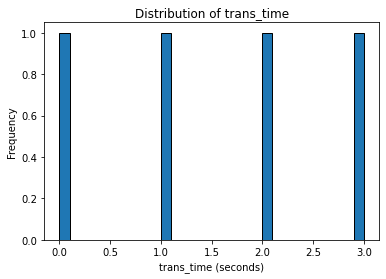

Mean trans_time: 1.5
Standard deviation of trans_time: 1.2909944487358056


In [41]:
trans_times = df['trans_time']
plt.hist(trans_times, bins=30, edgecolor='k')
plt.title('Distribution of trans_time')
plt.xlabel('trans_time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Check the mean and standard deviation
print("Mean trans_time:", trans_times.mean())
print("Standard deviation of trans_time:", trans_times.std())

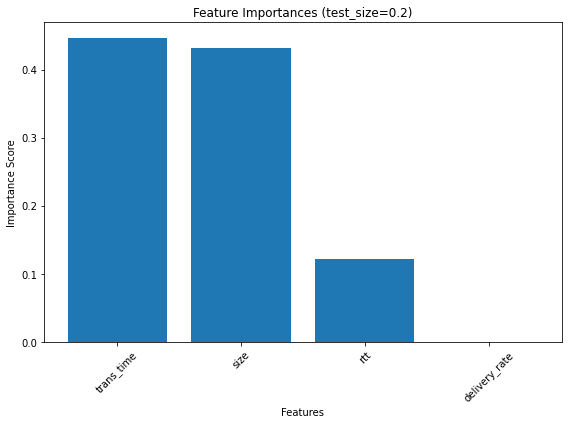

In [50]:
# Plot feature importances
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.title("Feature Importances (test_size=0.2)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

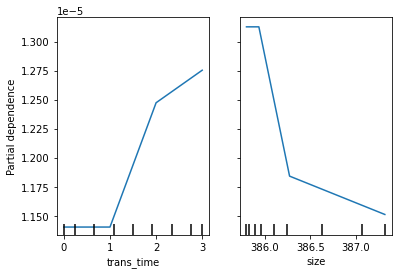

In [43]:
from sklearn.inspection import PartialDependenceDisplay

# Partial dependence plots for top 2 features
top_features = [indices[0], indices[1]]  # Top 2 features by importance
PartialDependenceDisplay.from_estimator(model, X, features=top_features, kind="average")
plt.show()

### Training Model with Data (test_size=0.4)

In [51]:
# Load data from the pickle file
output_file = '/mnt/md0/cs190n/psabherwal/output_file4.pkl'
with open(output_file, 'rb') as f:
    data = pickle.load(f)

# Inspect the data
#print(type(data))  # Check the data type
#print(data[:5])    # Print the first few entries to understand the structure

# Convert to a DataFrame if not already
flat_data = []
for session in data[0]:  # Assuming the first element is the relevant list
    if 'in' in session and 'out' in session:
        for i, input_chunk in enumerate(session['in']):
            if i < len(session['out']):
                flat_data.append({
                    'trans_time': i,
                    'size': sum(input_chunk),  # Example: sum of 'in' chunk values
                    'delivery_rate': max(input_chunk),  # Example: max of 'in' chunk values
                    'rtt': input_chunk[-1] if input_chunk else 0,  # Last value in 'in' chunk
                    'video_chunk_download_time': session['out'][i]
                })

# Convert to DataFrame
df = pd.DataFrame(flat_data)

# Ensure the DataFrame has the necessary columns
required_columns = ['trans_time', 'size', 'delivery_rate', 'rtt', 'video_chunk_download_time']
if not all(col in df.columns for col in required_columns):
    raise ValueError("The data is missing one or more required columns.")

# Select features and target variable
X = df[['trans_time', 'size', 'delivery_rate', 'rtt']]
y = df['video_chunk_download_time']

df = df[df['video_chunk_download_time'] != 0]

print("Feature summary:")
print(X.describe())
print("Target summary:")
print(y.describe())

X = X.fillna(0)
y = y.fillna(0)

# Verify no NaNs remain
assert not X.isnull().any().any(), "X still contains NaN values"
assert not y.isnull().any(), "y still contains NaN values"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

# Output results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print("Feature Importances:")
print(model.feature_importances_)

Feature summary:
       trans_time        size  delivery_rate       rtt
count    4.000000    4.000000       4.000000  4.000000
mean     1.500000  386.332929      42.826667  0.037833
std      1.290994    0.686312       0.000000  0.065457
min      0.000000  385.801764      42.826667  0.003333
25%      0.750000  385.903540      42.826667  0.005333
50%      1.500000  386.105793      42.826667  0.006000
75%      2.250000  386.535182      42.826667  0.038500
max      3.000000  387.318367      42.826667  0.136000
Target summary:
count    4.000000
mean     0.000015
std      0.000006
min      0.000010
25%      0.000011
50%      0.000013
75%      0.000017
max      0.000024
Name: video_chunk_download_time, dtype: float64
Mean Squared Error: 9.69875999999997e-11
R-squared: -3.7895111111110964
Feature Importances:
[0.         0.61538462 0.         0.38461538]


### Plotting the Results

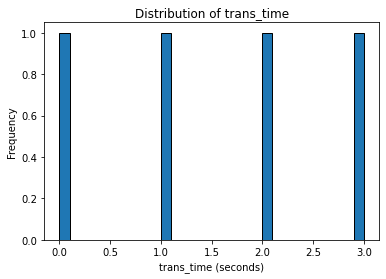

Mean trans_time: 1.5
Standard deviation of trans_time: 1.2909944487358056


In [52]:
trans_times = df['trans_time']
plt.hist(trans_times, bins=30, edgecolor='k')
plt.title('Distribution of trans_time')
plt.xlabel('trans_time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Check the mean and standard deviation
print("Mean trans_time:", trans_times.mean())
print("Standard deviation of trans_time:", trans_times.std())

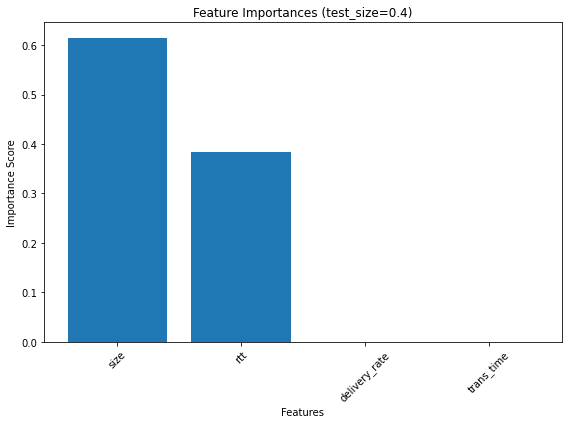

In [53]:
# Plot feature importances
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.title("Feature Importances (test_size=0.4)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

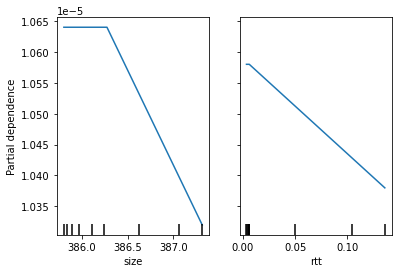

In [47]:
from sklearn.inspection import PartialDependenceDisplay

# Partial dependence plots for top 2 features
top_features = [indices[0], indices[1]]  # Top 2 features by importance
PartialDependenceDisplay.from_estimator(model, X, features=top_features, kind="average")
plt.show()